<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/gradient_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [10]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [14]:
X_train.shape

(320, 2)

In [20]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Epoch 1/60
320/320 [==============================] - 1s 2ms/step - loss: 0.6459 - accuracy: 0.6531
Epoch 2/60
320/320 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6531
Epoch 3/60
320/320 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6531
Epoch 4/60
320/320 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6531
Epoch 5/60
320/320 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.6531
Epoch 6/60
320/320 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6531
Epoch 7/60
320/320 [==============================] - 1s 2ms/step - loss: 0.6460 - accuracy: 0.6531
Epoch 8/60
320/320 [==============================] - 1s 2ms/step - loss: 0.6464 - accuracy: 0.6531
Epoch 9/60
320/320 [==============================] - 1s 2ms/step - loss: 0.6461 - accuracy: 0.6531
Epoch 10/60
320/320 [==============================] - 1s 2ms/step - loss: 0.6461 - accuracy: 0.6531

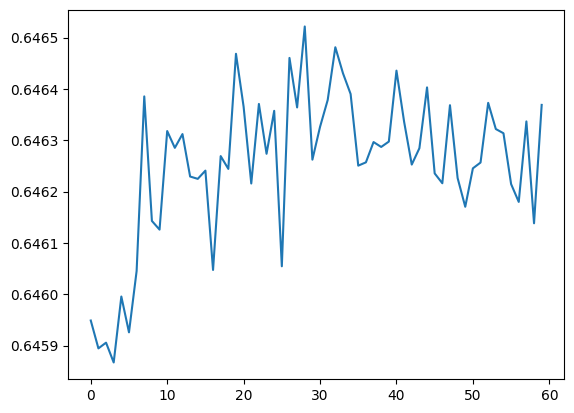

In [41]:
#model building for schostic gradient desc here batch size=1
from keras.backend import binary_crossentropy
model.compile( loss='binary_crossentropy',metrics=['accuracy'])
start=time.time()
history=model.fit(X_train,y_train,epochs=60,batch_size=1)
print(time.time()-start)
plt.plot(history.history['loss'])

Epoch 1/10
1/1 [==============================] - 1s 735ms/step - loss: 0.6457 - accuracy: 0.6531
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6456 - accuracy: 0.6531
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6531
1.117856740951538


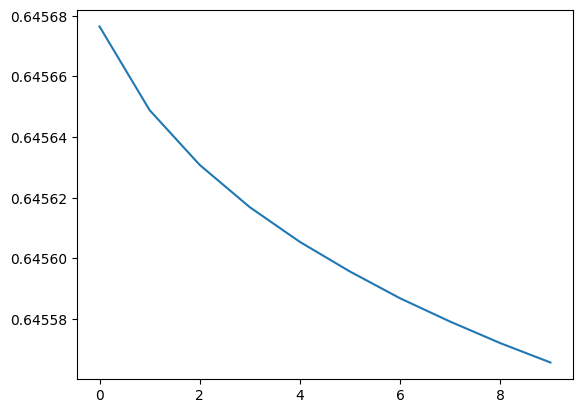

In [39]:
from keras.callbacks import History
# model building for batch gradient descend because batch_size is equal to num of row_size.
model.compile( loss='binary_crossentropy', metrics=['accuracy'])
import time
start=time.time()
history=model.fit(X_train, y_train,epochs=10,batch_size=320)
print(time.time()-start)
plt.plot(history.history['loss'])

Epoch 1/10
2/2 [==============================] - 1s 205ms/step - loss: 0.6559 - accuracy: 0.6367 - val_loss: 0.6041 - val_accuracy: 0.7188
Epoch 2/10
2/2 [==============================] - 0s 31ms/step - loss: 0.6558 - accuracy: 0.6367 - val_loss: 0.6042 - val_accuracy: 0.7188
Epoch 3/10
2/2 [==============================] - 0s 48ms/step - loss: 0.6558 - accuracy: 0.6367 - val_loss: 0.6043 - val_accuracy: 0.7188
Epoch 4/10
2/2 [==============================] - 0s 35ms/step - loss: 0.6558 - accuracy: 0.6367 - val_loss: 0.6044 - val_accuracy: 0.7188
Epoch 5/10
2/2 [==============================] - 0s 35ms/step - loss: 0.6558 - accuracy: 0.6367 - val_loss: 0.6045 - val_accuracy: 0.7188
Epoch 6/10
2/2 [==============================] - 0s 34ms/step - loss: 0.6557 - accuracy: 0.6367 - val_loss: 0.6046 - val_accuracy: 0.7188
Epoch 7/10
2/2 [==============================] - 0s 35ms/step - loss: 0.6557 - accuracy: 0.6367 - val_loss: 0.6047 - val_accuracy: 0.7188
Epoch 8/10
2/2 [==========

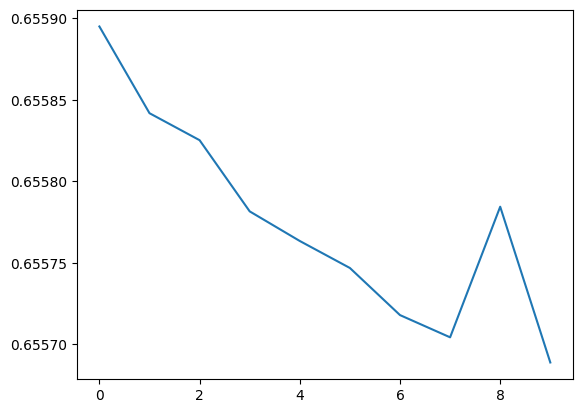

In [44]:
#MINI BATCH
model.compile( loss='binary_crossentropy',metrics=['accuracy'])
start=time.time()
history=model.fit(X_train,y_train,epochs=10,batch_size=150, validation_split=0.2)
print(time.time()-start)
plt.plot(history.history['loss'])